In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("menu.csv")
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


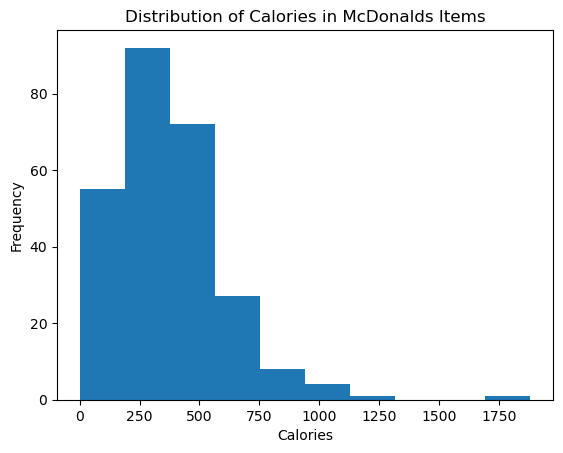

In [5]:
# 1a) Plot the histogram of the Calfoires. Comment on the datatype of the features
plt.hist(data['Calories'])
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Distribution of Calories in McDonalds Items")
plt.show()

In [6]:
data['Calories'].dtype

dtype('int64')

For this question, the datatype of the feature "calories" are integers, which are a quantitative, continuous variable.

Text(0.5, 1.0, 'Correlation Heatmap Between Features & Calories')

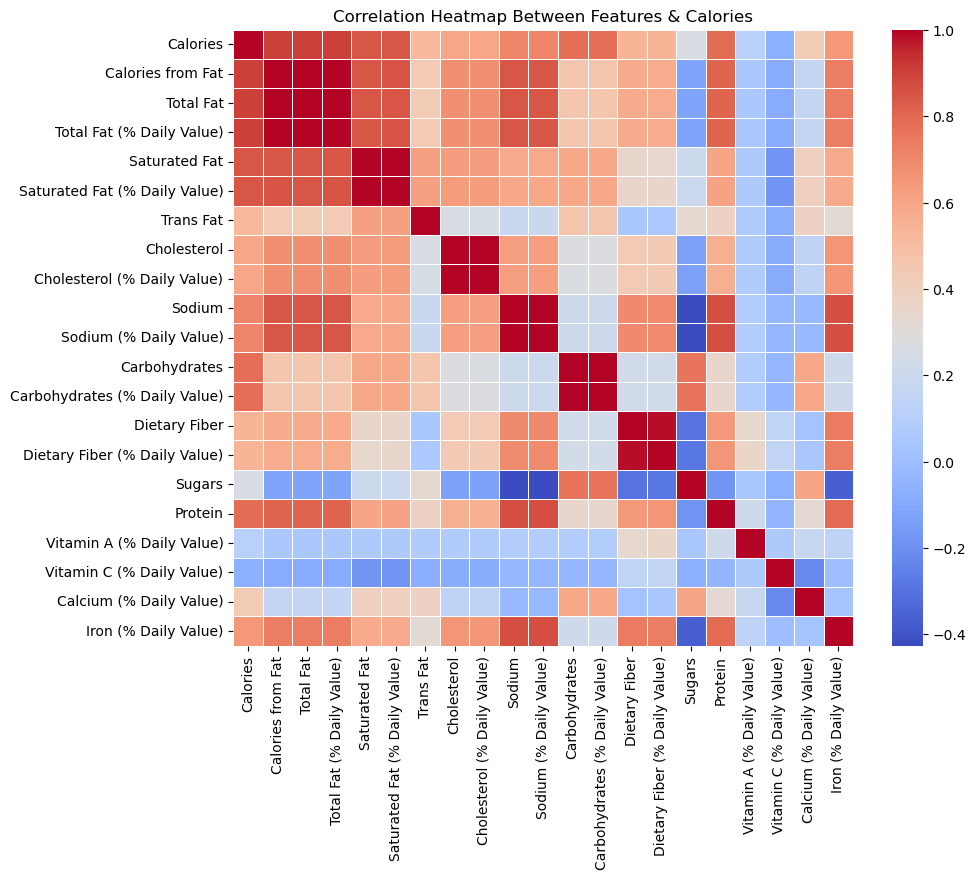

In [7]:
# 1b) PLot the correlation heatmap between features and Calories

# get rid of the categorical items
numerical_data = data.drop(columns = ['Category', 'Item', 'Serving Size'])

# plot sns heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(numerical_data.corr(), cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Heatmap Between Features & Calories")

The diagonal elements of the heatmap will always be one because those are the areas where the same features are predicting each other. Since features can completely predict each other, there is no variability, which makes it so that the correlation between two of the exact same feature is 1. 


In [11]:
# 1c) list the features whcih have the second and third largest positive correlation w/Calories.

calorie_correlation = numerical_data.corr().loc[['Calories'], :]
calorie_correlation.T.sort_values(by = 'Calories', ascending = False)

# results -> ['Calories from Fat', 'Total Fat']

,Calories
Calories,1.000000
Calories from Fat,0.904588
Total Fat,0.904409
Total Fat (% Daily Value),0.904123
Saturated Fat (% Daily Value),0.847631
Saturated Fat,0.845564
Protein,0.787847
Carbohydrates,0.781539
Carbohydrates (% Daily Value),0.781242
Sodium (% Daily Value),0.713415


The two features with the largest positive correlations, other than "Calories" are "Calories from Fat" and "Total Fat"

In [12]:
# 1d) List all features that have nagetive correlation w/Calories

calorie_correlation.loc["Calories"][calorie_correlation.loc["Calories"] < 0]

# Result -> 'Vitamin C (% Daily Value)'

Vitamin C (% Daily Value)   -0.068747
Name: Calories, dtype: float64

The only feature with a negative correlation with "Calories" is "Vitamin C (% Daily Value)". This feature does somewhat meet my expectation, because it is known that food with a lot of Vitamin C, like bell peppers, broccoli, brussel sprouts, and tomatoes, are vegetables that are typically lower in calories than other foods. On the other hand, a lot of very high calorie food, such as fast food, does not contain a lot of Vitamin C, which could explain the negative correlation between “Calories” and “Vitamin C (% Daily Value)”

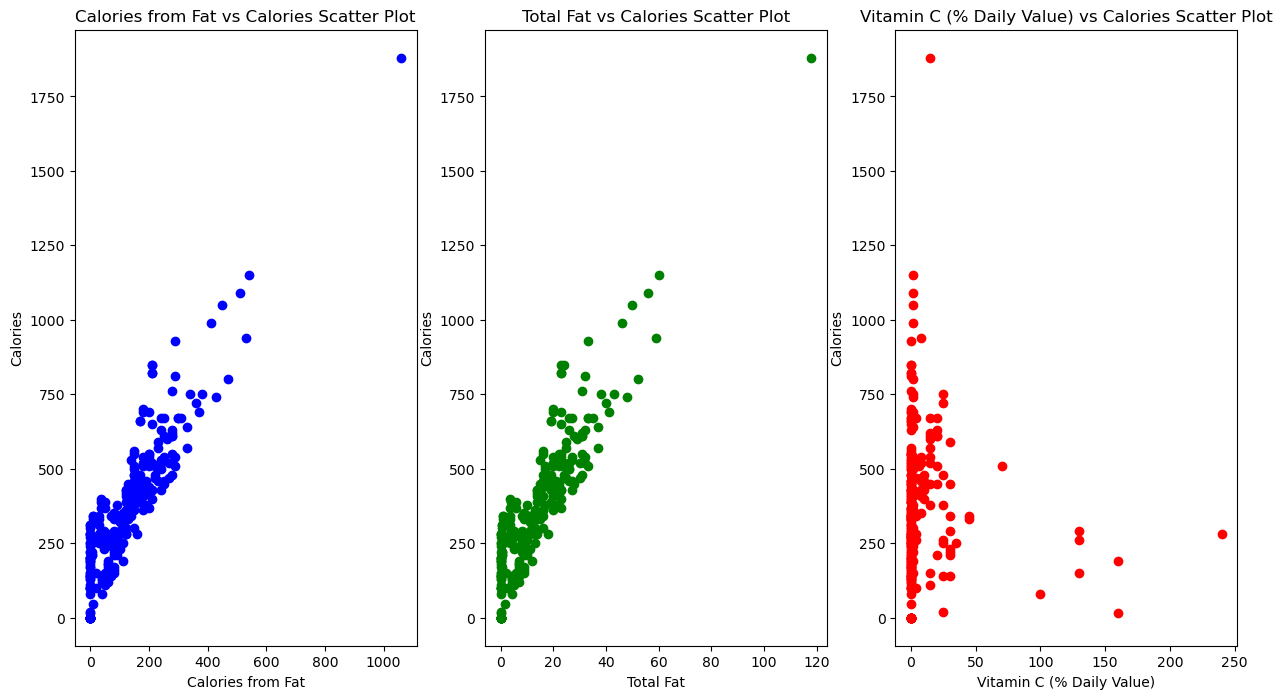

In [13]:
# 2a) Plot the scatter plot for 'features vs Calories' for all features found in 1(c) and 1(d)

# create a dictionary to plot all the scatter plots along with colors for easier differentiation
colors = {
    "Calories from Fat": "blue",
    "Total Fat": "green",
    "Vitamin C (% Daily Value)": "red"
}

# plot next to each other for easier plotting
fig, axes = plt.subplots(1, 3, figsize = (15, 8))

for ax, label in zip(axes, colors.keys()):
    ax.scatter(data[label], data["Calories"], color = colors[label])
    ax.set_xlabel(label)
    ax.set_ylabel("Calories")
    ax.set_title(f"{label} vs Calories Scatter Plot")

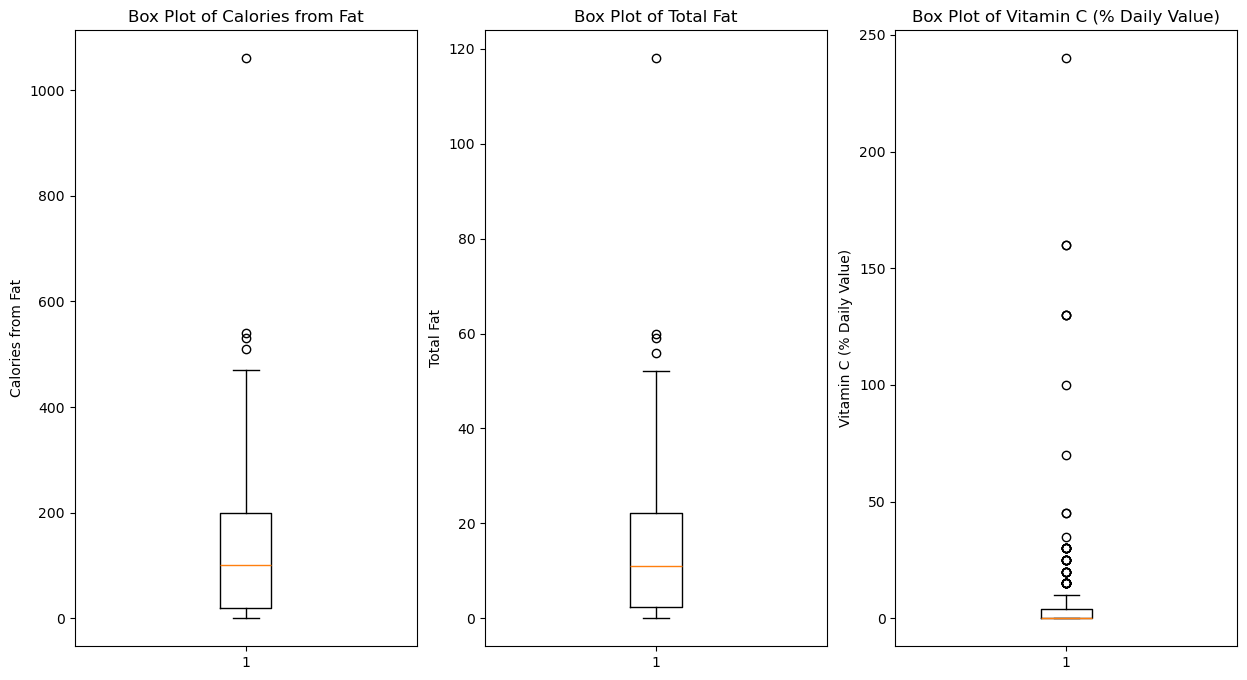

In [ ]:
# 2b) Plot the box plot for features in 1c and 1d

fig, axes = plt.subplots(1, 3, figsize = (15, 8))

for ax, label in zip(axes, colors.keys()):
    ax.boxplot(data[label])
    ax.set_ylabel(label)
    ax.set_title(f"Box Plot of {label}")

In [15]:
# 3a) Report the median and standard deviation for all numerical features

median_std_data = numerical_data.describe().loc[['std', '50%']]
median_std_data

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000


In [18]:
# 3b) Write code to replace outliers of all numerical fetures in a with NaN

def replace_outliers(df, median_std_data):
    # go through all columns and get a range where outliers cannot be in
    for column in df.columns:
        median = median_std_data.loc['50%', column]
        std = median_std_data.loc['std', column]
        bounds = [median - 3 * std, median + 3 * std]
        # replace those that aren't in the bounds w/NaN
        df[column] = df[column].where((df[column] >= bounds[0]) & (df[column] <= bounds[1]), np.nan)
    return df

cleaned_data = replace_outliers(numerical_data.copy(), median_std_data)
cleaned_data.describe().loc[['std', '50%']]

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
std,211.941065,106.047296,11.783668,18.124484,5.321873,26.639209,0.336717,57.881052,18.591678,503.284771,20.957637,25.472121,8.492925,1.322284,5.651278,26.457805,10.276582,12.480365,9.719391,17.019953,8.113066
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,30.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.000000,12.000000,8.000000,0.000000,20.000000,4.000000


In [19]:
cleaned_data.isna().sum()

Calories                         3
Calories from Fat                4
Total Fat                        4
Total Fat (% Daily Value)        4
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        9
Cholesterol                      5
Cholesterol (% Daily Value)      6
Sodium                           5
Sodium (% Daily Value)           5
Carbohydrates                    5
Carbohydrates (% Daily Value)    5
Dietary Fiber                    8
Dietary Fiber (% Daily Value)    5
Sugars                           4
Protein                          2
Vitamin A (% Daily Value)        6
Vitamin C (% Daily Value)        7
Calcium (% Daily Value)          0
Iron (% Daily Value)             3
dtype: int64

In [20]:
# 3c) WRite code to replace missing values with mean values. Report median and standard deviation.
means = cleaned_data.describe().loc[['mean']]

def replace_nans(df):
    # go through the columns and replace the NaN values with the means
    for column in df.columns:
        df[column] = df[column].fillna(means[column].values[0])
    return df


replaced_data = replace_nans(cleaned_data.copy())
replaced_data.describe().loc[["std", "50%"]]

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
std,210.710032,105.225212,11.692321,17.983982,5.321873,26.639209,0.330815,57.319632,18.375069,498.403136,20.754357,25.225053,8.410548,1.301702,5.596463,26.252703,10.236827,12.334957,9.587148,17.019953,8.065942
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000


When compared to our original data, there are significant decreases in standard deviations in almost all the features, while there are little to no changes in the medians, indicating that when the outliers were changed into the means, this made the data more normalized. 

In [22]:
from sklearn.linear_model import LinearRegression

# 4a) Train a predictor to predict the Calories as follows:
x = data[['Carbohydrates', 'Protein', 'Total Fat']]
y = data['Calories']

# created Linear Regression model from sklearn
model = LinearRegression()
model.fit(x, y)

# got the model coefficient and intercept to report
model_coef = model.coef_
model_int = model.intercept_
print(f"Model Coefficients: {model_coef}\nModel Intercept: {model_int}")

Model Coefficients: [3.97896903 4.04524858 9.01862206]
Model Intercept: -1.8292919301434836


Multiple linear regression results:
    $\text{Calories} = \theta_0 + \theta_1 \times [\text{Carbohydrates}] + \theta_2 \times [\text{Protein}] + \theta_3 \times [\text{Total Fat}]$

According to the multiple linear regression results, these are what the following refer to:

$\theta_0$ being approximately -1.83 means that when a food has no carbs, protein, or total fat, a food will have a default starting point of -1.83 calories. 

$\theta_1$ being approximately 3.98 means that every carbohydrate contributes 3.98 calories towards a food item.

$\theta_2$ being approximately 4.05 means that every gram of protein contributes 4.05 calories towards a food item.

$\theta_3$ being approximately 9.02 means that every gram of total fat contributes 9.02 calories towards a food item.

In [23]:
# 4b) Train another predictor to predict Calories as follows:

x = data[["Total Fat"]]
y = data["Calories"]

# created another Linear Regression model
model2 = LinearRegression()
model2.fit(x, y)

# similarly, report coefficient and intercept
model2_coef = model2.coef_
model2_int = model2.intercept_
print(f"Model2 Coefficients: {model2_coef}\nModel2 Intercept: {model2_int}")

Model2 Coefficients: [15.29651666]
Model2 Intercept: 151.58818902493147


Simple linear regression results:
    $\text{Calories} = \theta_0 + \theta_1 \times [\text{Total Fat}]$

where:

$\theta_0 = 151.58818902493147$ 

$\theta_1 = 15.29651666$

The coefficients are probably very different between the two linear regression models because the simple linear regression model can only rely on one feature to determine it's results. This means that it cannot consider a large portion of possibilities, unlike the previous model, because even if an item had 0 total fat, there was a chance it had protein or carbohydrates, which could be used in it's formula. In the simple linear regression results, it can only rely on total fat, so it needs something as a baseline point when there is no total fat in a food item.

In [24]:
# 4c) Split the data into 90% training and 10% for testing. Train using all features. What is the model's MSE on training/test sets.

numerical_data = numerical_data.copy()
train_data, test_data = numerical_data.iloc[:int(0.9 * numerical_data.shape[0])], numerical_data.iloc[int(0.9 * numerical_data.shape[0]): ]

In [24]:
from sklearn.metrics import mean_squared_error

train_X, train_Y = train_data.drop(columns = ["Calories"]), train_data["Calories"]
test_X, test_Y = test_data.drop(columns = ["Calories"]), test_data["Calories"]

finalModel = LinearRegression()
finalModel.fit(train_X, train_Y)

train_pred = finalModel.predict(train_X)
training_mse = mean_squared_error(train_Y, train_pred)

test_pred = finalModel.predict(test_X)
test_mse = mean_squared_error(test_Y, test_pred)
print(f"Training MSE: {training_mse}\nTest MSE: {test_mse}")

Training MSE: 18.915641610754008
Test MSE: 60.196732002659665


The model performed significantly better on the training set than the test set. This could potentially mean there was overfitting, especially if there were certain items that were especially similar. Another reason that this could be is because the testing data mostly contained items from the category `Smoothies & Shakes', which the training data had no information about, leading to predictions that were not as accurate. 


5a\) Express odds of predicting label 1 in terms of weights and features


First let's establish our weights, and values, where $w = [\theta_1, \theta_2, ..., \theta_n]$ and $x = [x_1, x_2, ..., x_n]$. Additionally, we need to establish the meaning of a logistic regression function, which is in this case, results in us wanting to find the odds to predicting label 1. This results in the following equation: 

\begin{align}
P(y = 1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}
\end{align}

where z is the linear combination (dot product) of the weights and features. When placed into the expression to get the odds of an event, we get this, which can be simplfied, as shown below

\begin{align*}
\text{odds} &= \frac{P(\text{label}=1)}{1-P(\text{label}=1)} \\
&= \frac{\sigma(z)}{1 - \sigma(z)} \\
&= \frac{\frac{1}{1 + e^{-z}}}{1 - \frac{1}{1 + e^{-z}}} \\
&= \frac{\frac{1}{1 + e^{-z}}}{\frac{e^{-z}}{1 + e^{-z}}} \\
&= \frac{1}{e^{-z}} \\
&= e^z \\
&= e^{w^Tx}
\end{align*} 

5b\) Analysis of adds ratio

By increasing one feature value $x_i$ by 1 and letting all the features remain the same, there is a slight ratio change. For simplicitie's sake, let's change the value $x_1$ into $x_1 + 1$. This means these are our weights and values:

\begin{align}
w = [\theta_1, \theta_2, ..., \theta_n] 
\end{align}

\begin{align}
x = [x_1 + 1, x_2, ..., x_n]
\end{align}

The calculation of the odds remains the same as before, however our final result of the odds is different now. Instead of our final result of $e^{w^Tx} = e^{\theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n}$, the result for this increased feature value change is now now $e^{\theta_1x_1 + \theta_1 + \theta_2x_2 + ... + \theta_nx_n}$, essentially giving a bias term of $\theta_1$ to the expression. 

This new ratio of the new odds of predicting label 1 versus the old odds of predicitng label 1 are now: 

\begin{align*}
    \text{ratio} &= \frac{e^{\theta_1x_1 + \theta_1 + \theta_2x_2 + ... + \theta_nx_n}}{ e^{\theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n}} \\
    &= e^{(\theta_1x_1 + \theta_1 + \theta_2x_2 + ... + \theta_nx_n) - (\theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n}) \\
    &= e^{\theta_1}
\end{align*}

Therefore. the ratio of new odds of predicting label 1 to the old odds of predicting label 1 in this case is $e^{\theta_1}$, which when generalized to $x_i$, would have a ratio of $e^{\theta_i}$. We can infer that raising the feature $x_i$ by 1 results in multiplying the odds of predicting label 1 by $e^{\theta_i}$, with odds decreasing or increasing by a factor of $e^{\theta_i}$.

We can also deduce that since the weights directly correspond to the feature values, the larger a weight, the more influential and therefore stronger a weight is, the larger the change in chance for predicting a label.